# What is RAG??



RAG stands for Retrieval-Augmented Generation.

It is a technique that combines information retrieval with text generation using a large language model (LLM). It allows the model to generate fact-based, up-to-date, and grounded answers by searching a knowledge source (like a document database) before answering.

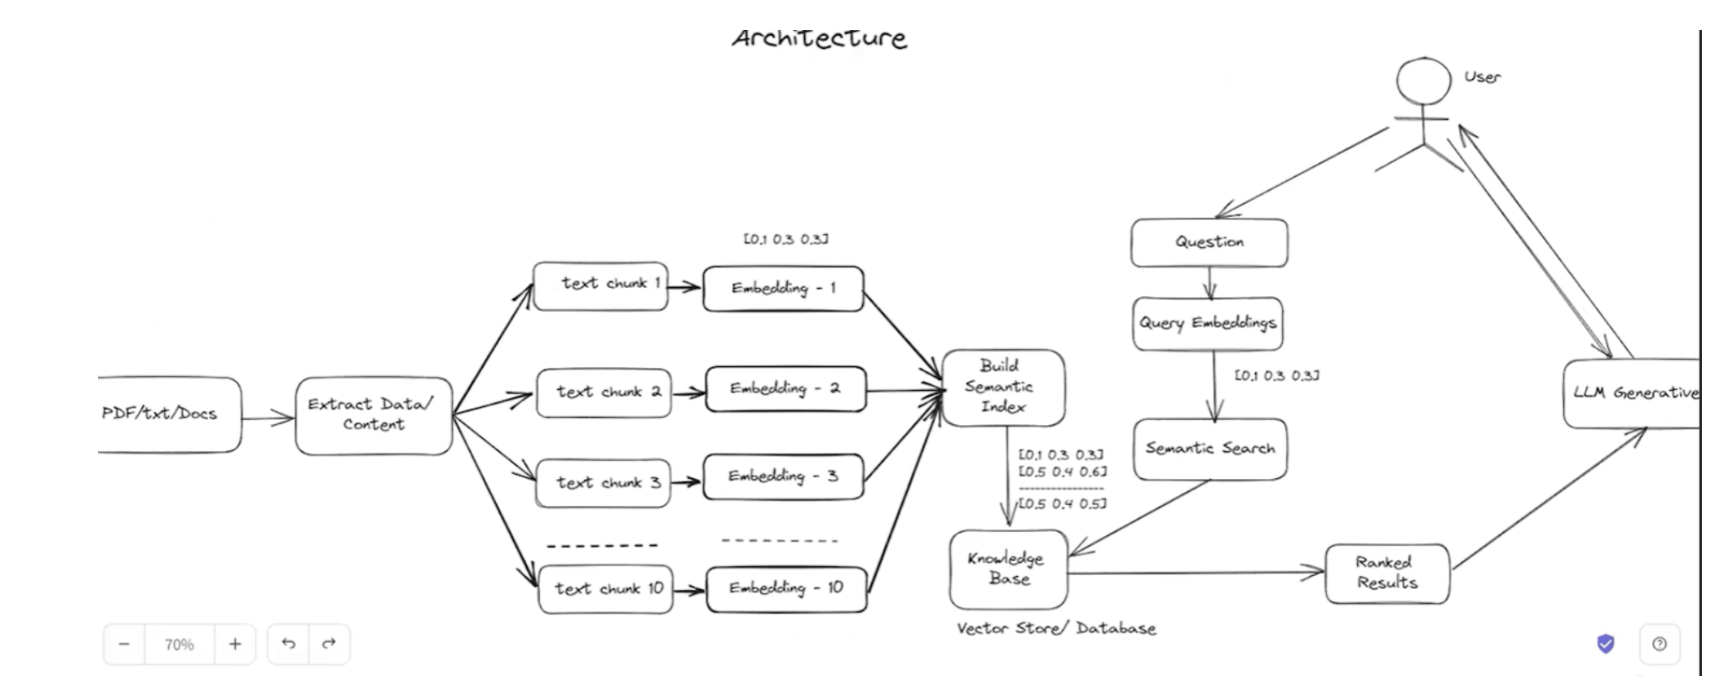

In [7]:
from google.colab import userdata
Groq_API=userdata.get('GroqAPI')

1: Data Ingestion

2: Data Retrieval

3: Data Generation

# Data Ingestion



In [9]:
import requests
import chromadb
from chromadb.config import Settings

In [10]:
url="https://raw.githubusercontent.com/divmain/GitSavvy/master/README.md"

In [11]:
response=requests.get(url)
text=response.text


In [12]:

with open("output.txt", "w") as file:
    file.write(text)

print("File saved successfully!")


File saved successfully!


In [13]:
with open("/content/output.txt", "r") as file:
    content = file.readlines()




# Chunking of Data

1: Using RecursiveTextSplitter

In [14]:
from datetime import datetime

class Document:
    def __init__(self, page_content, metadata=None):
        self.page_content = page_content
        # Metadata can be a dictionary storing arbitrary info
        self.metadata = metadata or {}

class TextLoader:
    def __init__(self, filepath, encoding="utf-8"):
        self.filepath = filepath
        self.encoding = encoding

    def load(self):
        with open(self.filepath, "r", encoding=self.encoding) as f:
            content = f.read()

        # Example metadata
        metadata = {
            "source": self.filepath,
            "length": len(content),
            "loaded_at": datetime.now().isoformat()
        }

        return [Document(page_content=content, metadata=metadata)]

# Usage
loader = TextLoader("output.txt", encoding="utf-8")
docs = loader.load()

print("Content:", docs[0].page_content)
print("Metadata:", docs[0].metadata)


Content: # GitSavvy

[![tests](https://github.com/timbrel/GitSavvy/actions/workflows/lint.yml/badge.svg)](https://github.com/timbrel/GitSavvy/actions/workflows/lint.yml)
[![License: MIT](https://img.shields.io/badge/-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

GitSavvy is a powerful and mature plugin for Sublime Text that brings most of Git's functionalities directly into the text editor.

It offers features that just come naturally when in an editor.  For example, you can easily interactively stage or discard changes per hunk, per line, per file. Search for specific content that you just select right in the buffer.  Navigate through the history of commits and revisions of files, write clear and long(!) commit messages (because who wants to deal with a clunky input box in a separate program for that?).  GitSavvy makes standard rebasing actions, like rewording a commit message, trivial, and advanced rebasing techniques, such as splitting a feature branch into two, manageable.

In [15]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Creating object
text_splitter=RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50)

In [16]:
text_chunks=text_splitter.split_documents(docs)
len(text_chunks)

53


1. Generate embeddings for each chunk

You want to convert each text chunk into an embedding vector so you can search and retrieve relevant chunks later.

In [18]:
from langchain.embeddings import HuggingFaceEmbeddings

# Load a local or hosted model like "all-MiniLM-L6-v2"
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


In [19]:
pip install faiss-cpu

In [20]:
from langchain.vectorstores import FAISS

vectorStore=FAISS.from_documents(text_chunks,embeddings)
retriever= vectorStore.as_retriever()

In [ ]:
vectorStore=FAISS.from_documents(text_chunks,embeddings)

In [ ]:
retriever= vectorStore.as_retriever()

In [22]:
pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 5.4 MB/s eta 0:00:00


In [23]:

from langchain_groq import ChatGroq

llm = ChatGroq(
    groq_api_key=Groq_API,
    model_name="llama3-8b-8192"
)

from langchain.chains import RetrievalQA

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    return_source_documents=True
)

query = "What is this document about?"
result = qa_chain({"query": query})


print("Answer:", result["result"])
print("\nSource Documents:")
for doc in result["source_documents"]:
    print("-", doc.metadata)
    print(doc.page_content[:300], "\n")


/tmp/ipython-input-2442349709.py:17: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain({"query": query})


Answer: This document appears to be about the GitSavvy plugin for Sublime Text, which provides features and views to interact with Git repositories within the editor. It mentions the availability of help for special views and provides information on how to access feature documentation.

Source Documents:
- {'source': 'output.txt', 'length': 19010, 'loaded_at': '2025-08-29T12:52:26.435828'}
## Documentation

The documentation is probably outdated.  Yeah it's sad but you can contribute and I will eventually get onto it **but** every special view has help available, just press `?`.

Feature documentation can be found [here](docs/README.md).  It can also be accessed from within Sublime by 

- {'source': 'output.txt', 'length': 19010, 'loaded_at': '2025-08-29T12:52:26.435828'}
GitSavvy will then show you snippets of commits/patches to show you the evolution of those lines.
`[o]` on such an excerpt will open the complete commit.  `[O]` will display the version of the file
as it existed at th